### Loading libraries

In [1]:
import math
import numpy as np
import scipy.stats
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

### Monte Carlo Simulation

In [2]:
n_trials = 100000
A = beta.rvs(39, 121, size = n_trials)
B = beta.rvs(53, 107, size = n_trials)
sum(B>A)/n_trials

0.95824

d:\Miniconda\envs\datascience\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

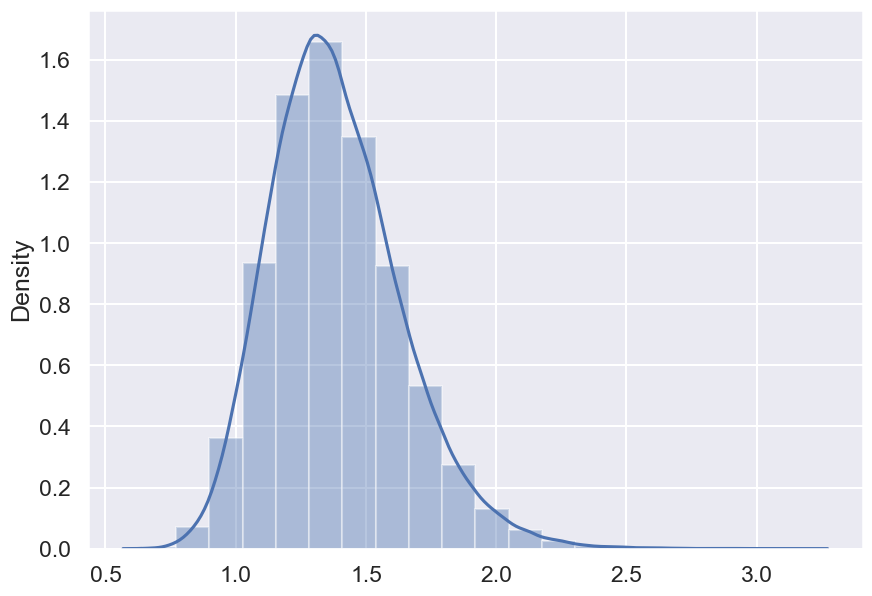

In [3]:
# Plotting a histogram
ratio = B/A
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(ratio,
             ax=ax,
             bins = 20)

### Generating an ecdf plot

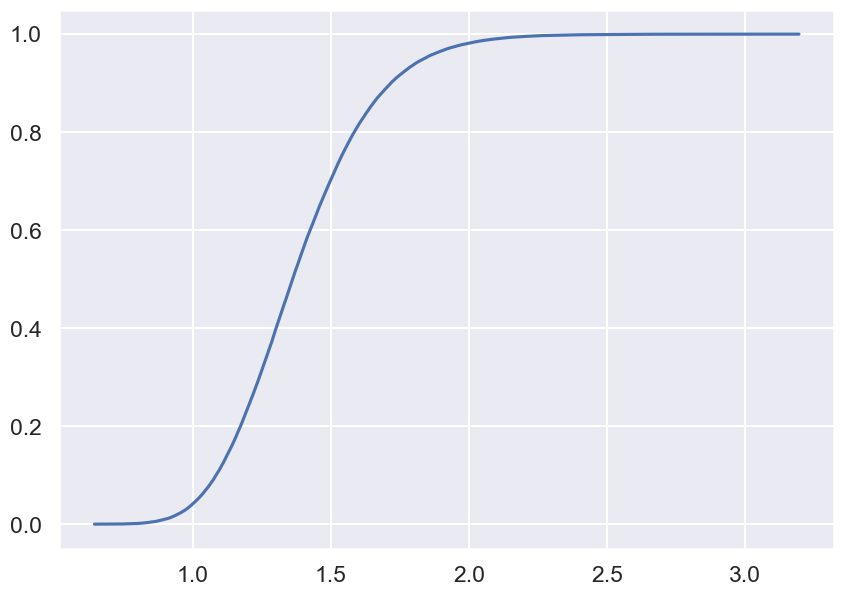

In [4]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1)/n
    return x, y

x, y = ecdf(ratio)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x,
        y)

### Q1. 

* Suppose a director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won’t perform any differently than the original variant. 

* How could you account for this in our model? Implement this change and see how your final conclusions change as well

In [5]:
prior_a = 300
prior_b = 700
A = beta.rvs(36 + prior_a, 114 + prior_b, size=n_trials)
B = beta.rvs(50 +  prior_a, 100 +  prior_b, size=n_trials)
sum(B>A)/n_trials

0.73708

### Q2. 

* The lead designer sees your results and insists that there’s no way that variant B should perform better with no images. She feels that you should assume the conversion rate for variant B is closer to 20 percent than 30 percent. Implement a solution for this and again review the results of our analysis.

In [6]:
a_prior_a = 30
a_prior_b = 70

b_prior_a = 20
b_prior_b = 80

A = beta.rvs(36 + a_prior_a, 114 + a_prior_b, size=n_trials)
B = beta.rvs(50 + b_prior_a, 100 + b_prior_b, size=n_trials)
sum(B>A)/n_trials

0.65523

### Q3. 

* Assume that being 95 percent certain means that you’re more or less “convinced” of a hypothesis. Also assume that there’s no longer any limit to the number of emails you can send in your test. If the true conversion for A is 0.25 and for B is 0.3, explore how many samples it would take to convince the director of marketing that B was in fact superior. Explore the same for the lead designer.

##### `In case of director of marketing`


In [7]:
a_true_rate = 0.25
b_true_rate = 0.3

prior_a = 300
prior_b = 700

p_b_sup = 0
n_samples = 0
n_trials = 100000

def b_supirior(B, A, n_trials):
    return sum(B > A)/n_trials

def draw_results(n_samples, rate):
    results = []
    for i in range(int(n_samples/2)):
        draw = random.random()
        results.append(draw)
    results = np.array(results)
    a = sum(results <= rate)
    b = sum(results > rate)
    return a, b

while p_b_sup < 0.95:
    n_samples += 100
    a_samples_a, a_samples_b = draw_results(n_samples, a_true_rate)
    b_samples_a, b_samples_b = draw_results(n_samples, b_true_rate)
    a_samples = beta.rvs(a_samples_a + prior_a, a_samples_b + prior_b, size = n_trials)
    b_samples = beta.rvs(b_samples_a + prior_a, b_samples_b + prior_b, size = n_trials)
    p_b_sup = b_supirior(b_samples, a_samples, n_trials)
    print(n_samples)
        


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


##### `In case of lead designer`

In [8]:
a_true_rate = 0.2
b_true_rate = 0.3

prior_a = 300
prior_b = 700

p_b_sup = 0
n_samples = 0
n_trials = 100000

def b_supirior(B, A, n_trials):
    return sum(B > A)/n_trials

def draw_results(n_samples, rate):
    results = []
    for i in range(int(n_samples/2)):
        draw = random.random()
        results.append(draw)
    results = np.array(results)
    a = sum(results <= rate)
    b = sum(results > rate)
    return a, b

while p_b_sup < 0.95:
    n_samples += 100
    a_samples_a, a_samples_b = draw_results(n_samples, a_true_rate)
    b_samples_a, b_samples_b = draw_results(n_samples, b_true_rate)
    a_samples = beta.rvs(a_samples_a + prior_a, a_samples_b + prior_b, size = n_trials)
    b_samples = beta.rvs(b_samples_a + prior_a, b_samples_b + prior_b, size = n_trials)
    p_b_sup = b_supirior(b_samples, a_samples, n_trials)
    print(n_samples)

100
200
300
400
500
600
700
800
900
1000
1100


### Interactive A/B testing using ipywidget

In [9]:
%matplotlib inline
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            # widgets and interactivity
import matplotlib; import matplotlib.pyplot as plt        # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                  # set axes and grids in the background for all plots
import numpy as np                                        # working with arrays
from scipy.stats import triang                            # parametric distributions
from scipy.stats import binom
from scipy.stats import norm

In [10]:
from scipy.stats import beta, boxcox_normmax
import seaborn as sns

# Integer box for the model input

A_converted = widgets.BoundedIntText(
    value=39,
    min=0,
    max=10000,
    step=1,
    description='A_converted',
    disabled=False
)

A_not_converted = widgets.BoundedIntText(
    value=121,
    min=0,
    max=10000,
    step=1,
    description='A_not_converted',
    disabled=False
)

B_converted = widgets.BoundedIntText(
    value=53,
    min=0,
    max=10000,
    step=1,
    description='B_converted',
    disabled=False
)

B_not_converted = widgets.BoundedIntText(
    value=107,
    min=0,
    max=10000,
    step=1,
    description='B_not_converted',
    disabled=False
)

Prior_a = widgets.BoundedIntText(
    value=1,
    min=0,
    max=10000,
    step=1,
    description='Prior_A',
    disabled=False
)

Prior_b = widgets.BoundedIntText(
    value=1,
    min=0,
    max=10000,
    step=1,
    description='Prior_B',
    disabled=False
)


ui = widgets.VBox([A_converted, A_not_converted, B_converted, B_not_converted, Prior_a, Prior_b],)

def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1)/n
    return x, y

def f(A_converted, A_not_converted, B_converted, B_not_converted, Prior_a, Prior_b): 

    n_trials = 100000
    A = beta.rvs(A_converted + Prior_a, A_not_converted + Prior_b, size = n_trials)
    B = beta.rvs(B_converted + Prior_a, B_not_converted + Prior_b, size = n_trials)
    # sum(B>A)/n_trials

    ratio = B/A
    fig, ax = plt.subplots(figsize=(7,4), nrows = 1, ncols = 2)
    sns.distplot(ratio,
                ax=ax[0],
                bins = 20)
    ax[0].set_title("Distribution of B/A")

    x, y = ecdf(ratio)
    ax[1].plot(x,
            y)
    ax[1].set_title("ECDF of B/A")

interactive_plot = widgets.interactive_output(f, {'A_converted': A_converted,
                                                  'A_not_converted': A_not_converted,
                                                  'B_converted': B_converted,
                                                  'B_not_converted': B_not_converted,
                                                  'Prior_a': Prior_a, 
                                                  'Prior_b' : Prior_b})
interactive_plot.clear_output(wait = True)  

In [11]:
display(ui, interactive_plot) 

Output(outputs=({'name': 'stderr', 'text': 'd:\\Miniconda\\envs\\datascience\\lib\\site-packages\\seaborn\\dis…